# Data Science I Final Project: Data Visualization

In [1]:
import pandas as pd
import numpy as mp
from plotnine import *
%matplotlib inline
import matplotlib.pyplot as plt # for plotting
import seaborn as sns

In [2]:
# reading in data

## comments data
swift_pop_comments = pd.read_csv(r"C:\Users\samue\OneDrive\Documents\Grad school - Georgetown MS DSPP\Data Science I\Final Project\swift_pop_comments.csv")
menendez_scandal_comments = pd.read_csv(r"C:\Users\samue\OneDrive\Documents\Grad school - Georgetown MS DSPP\Data Science I\Final Project\menendez_scandal_comments.csv")
uvalde_horrific_comments = pd.read_csv(r"C:\Users\samue\OneDrive\Documents\Grad school - Georgetown MS DSPP\Data Science I\Final Project\uvalde_horrific_comments.csv")
ukraine_horrific_comments = pd.read_csv(r"C:\Users\samue\OneDrive\Documents\Grad school - Georgetown MS DSPP\Data Science I\Final Project\ukraine_horrific_comments.csv")

## videos data
swift_pop_videodata = pd.read_csv(r"C:\Users\samue\OneDrive\Documents\Grad school - Georgetown MS DSPP\Data Science I\Final Project\swift_pop_videodata.csv")
menendez_scandal_videodata = pd.read_csv(r"C:\Users\samue\OneDrive\Documents\Grad school - Georgetown MS DSPP\Data Science I\Final Project\menendez_scandal_videodata.csv")
uvalde_horrific_videodata = pd.read_csv(r"C:\Users\samue\OneDrive\Documents\Grad school - Georgetown MS DSPP\Data Science I\Final Project\uvalde_horrific_videodata.csv")
ukraine_horrific_videodata = pd.read_csv(r"C:\Users\samue\OneDrive\Documents\Grad school - Georgetown MS DSPP\Data Science I\Final Project\ukraine_horrific_videodata.csv")



In [3]:
# data frame management
swift_pop_comments["comment_score"] = swift_pop_comments["comment_like_count"] + 1
menendez_scandal_comments["comment_score"] = menendez_scandal_comments["comment_like_count"] + 1
uvalde_horrific_comments["comment_score"] = uvalde_horrific_comments["comment_like_count"] + 1
ukraine_horrific_comments["comment_score"] = ukraine_horrific_comments["comment_like_count"] + 1

## Data Visualizations

In [22]:
# Functions

## Comments over time graph

def comments_over_time(df, title):
    df2 = df.groupby('day_published').size().reset_index(name='num_comments')
    df2['day_published'] = pd.to_datetime(df2['day_published'])
    return (ggplot(df2, aes(x=df2.day_published, y=df2.num_comments)) +
     geom_line() +
     labs(x='Date', y='Comments', title=title))

def comment_scores_over_time(df, title):
    df2 = df.groupby('day_published')["comment_score"].sum().reset_index(name="comment_score")
    df2["comment_score"] = pd.to_numeric(df2["comment_score"])
    df2["day_published"] = pd.to_datetime(df2["day_published"], format='%Y-%m-%d')
    return (ggplot(df2, aes(x=df2["day_published"], y=df2["comment_score"])) +
     geom_line() +
     labs(x='Date', y='Comment Score', title=title))

def comments_per_video_over_time(topic_comment_df, topic_video_df, title):
    
    comment_df = topic_comment_df.groupby('day_published').size().reset_index(name='num_comments')
    comment_df['day_published'] = pd.to_datetime(comment_df['day_published'])
    
    vid_df = topic_video_df.groupby('day_published').size().reset_index(name='num_vids')
    vid_df['day_published'] = pd.to_datetime(vid_df['day_published'])
    
    comment_per_vid = pd.merge(comment_df, vid_df, on='day_published', how='inner')
    comment_per_vid["comments_per_vid"] = (comment_per_vid["num_comments"] / comment_per_vid["num_vids"])
    
    return (ggplot(comment_per_vid, aes(x=comment_per_vid.day_published, y=comment_per_vid.comments_per_vid)) +
     geom_line() +
     labs(x='Date', y='Comments per Video', title=title))

    

## Videos over time graph
    
def videos_over_time(df, title):
    df2 = df.groupby('day_published').size().reset_index(name='num_videos')
    df2['day_published'] = pd.to_datetime(df2['day_published'])
    return (ggplot(df2, aes(x=df2.day_published, y=df2.num_videos)) +
     geom_line() +
     labs(x='Date', y='Videos', title=title))



### Number of Comments over time

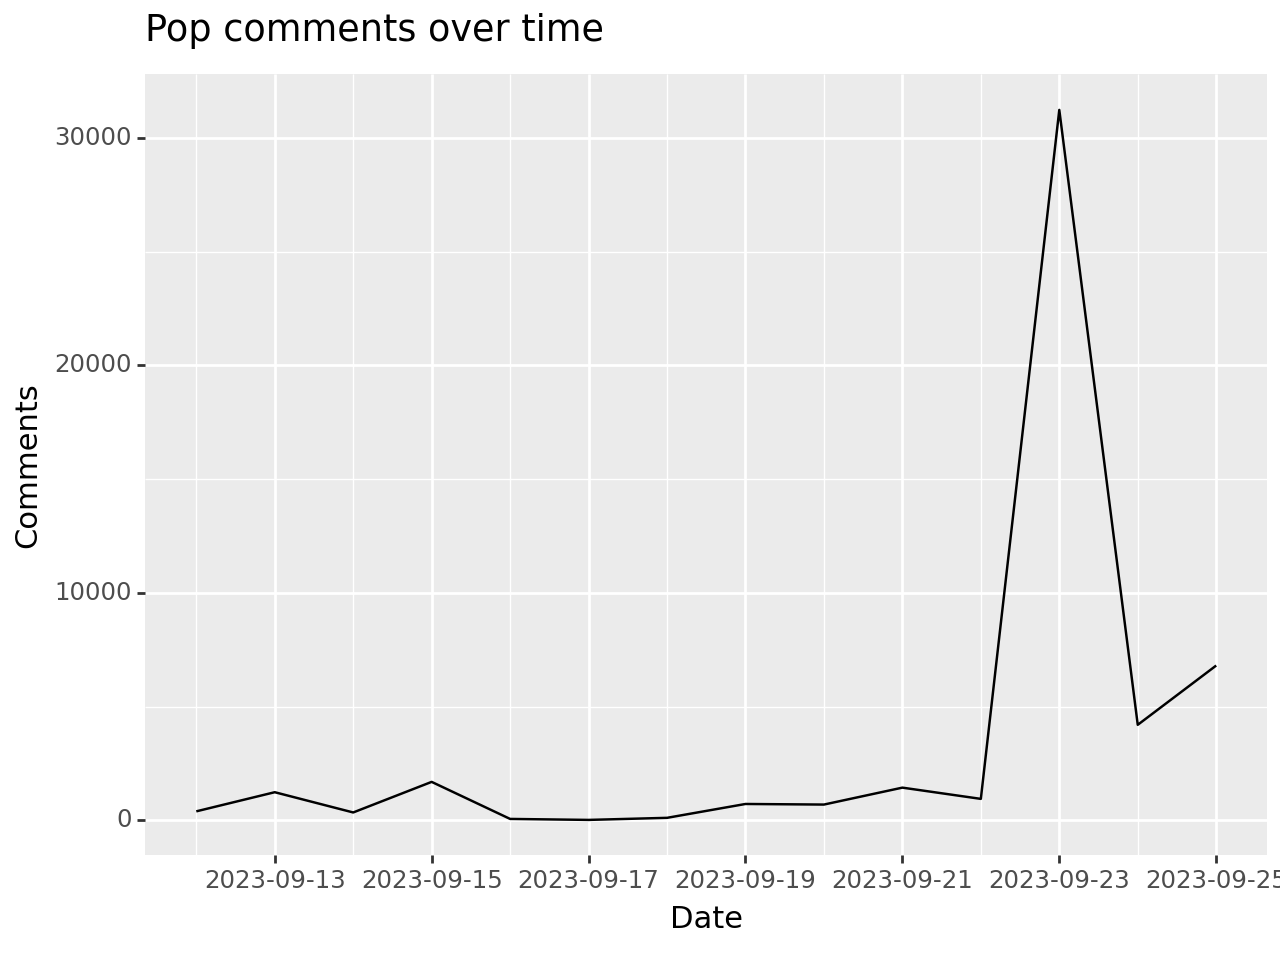

<Figure Size: (640 x 480)>

In [5]:
# swift_pop_comments - Comments over time
comments_over_time(swift_pop_comments, "Pop comments over time")


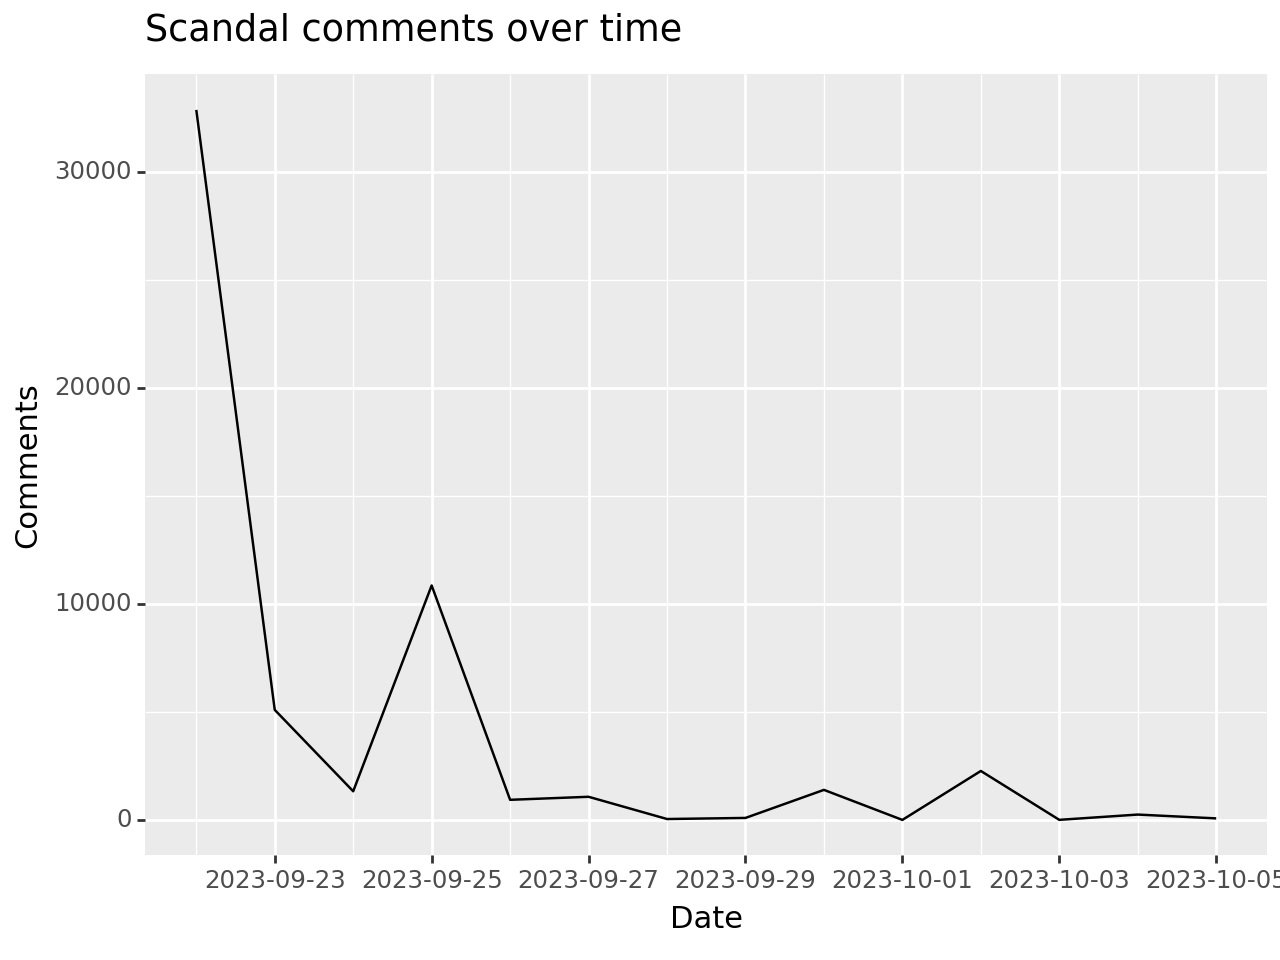

<Figure Size: (640 x 480)>

In [175]:
# mendendez_scandal_comments - Comments over time
comments_over_time(menendez_scandal_comments, "Scandal comments over time")

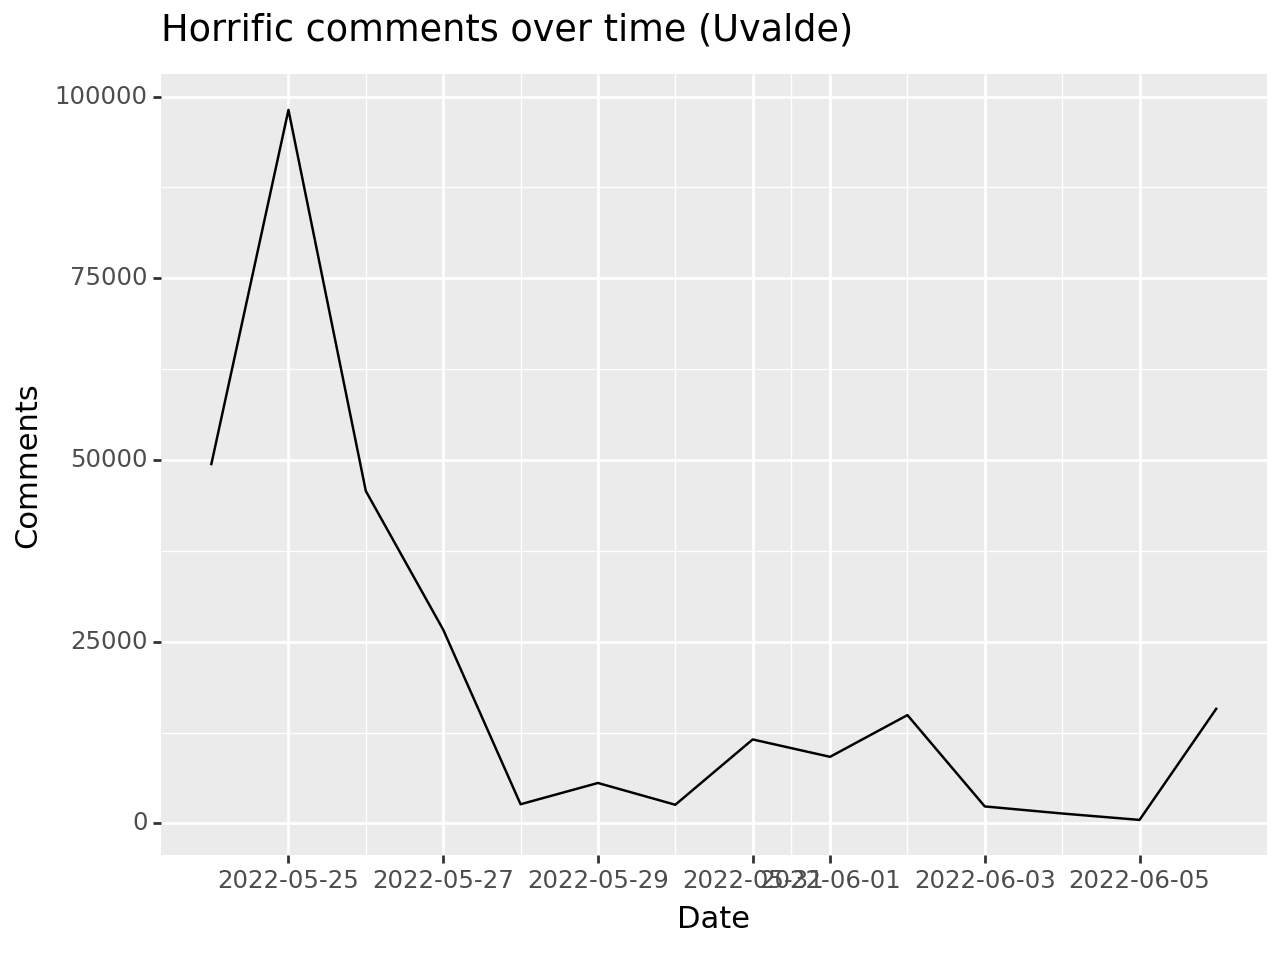

<Figure Size: (640 x 480)>

In [163]:
# uvalde_horrific_comments - Comments over time
comments_over_time(uvalde_horrific_comments, "Horrific comments over time (Uvalde)")

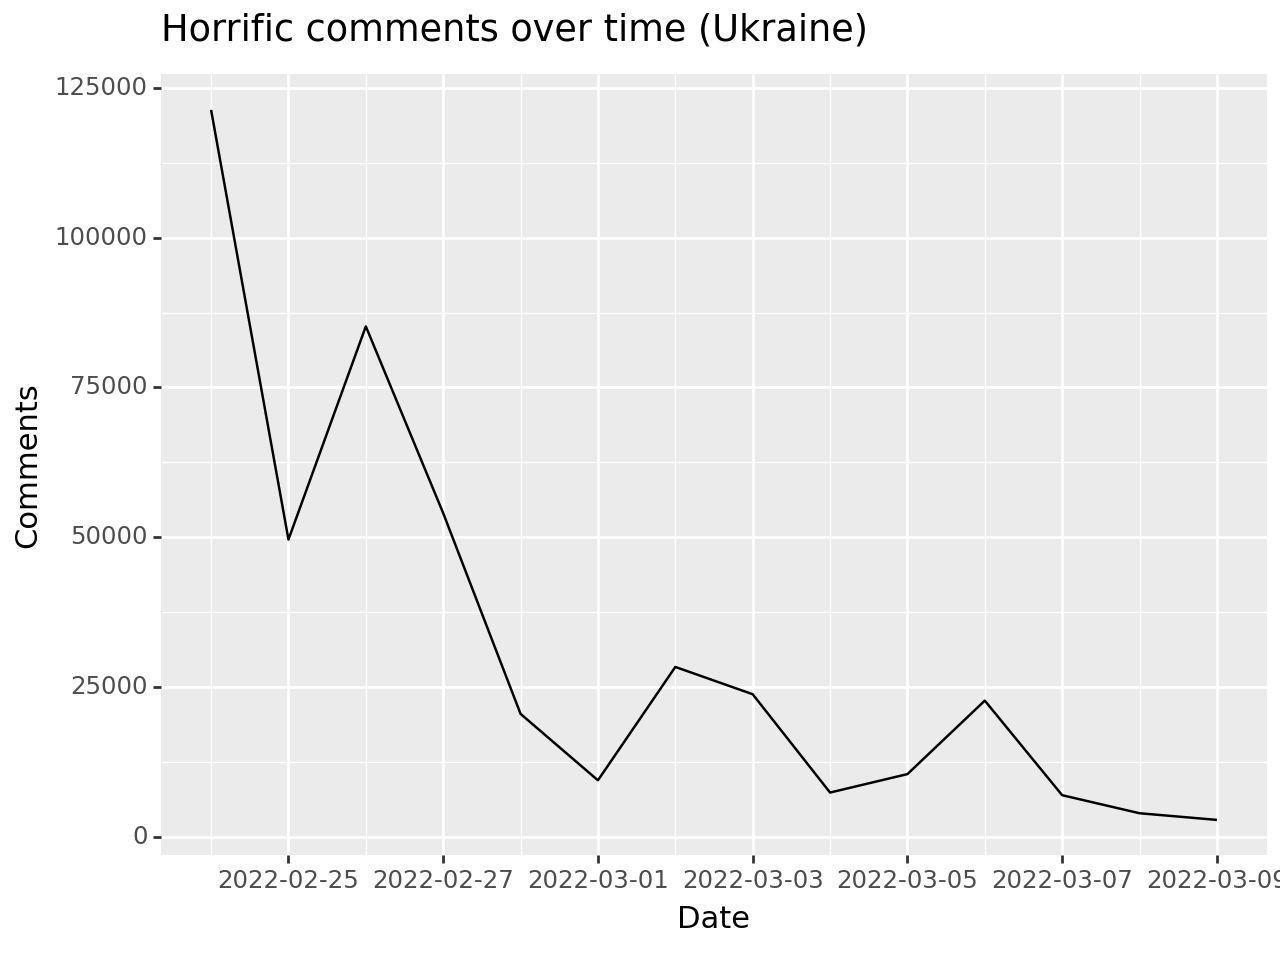

<Figure Size: (640 x 480)>

In [164]:
# ukraine_horrific_comments - Comments over time
comments_over_time(ukraine_horrific_comments, "Horrific comments over time (Ukraine)")


### Number of videos over time

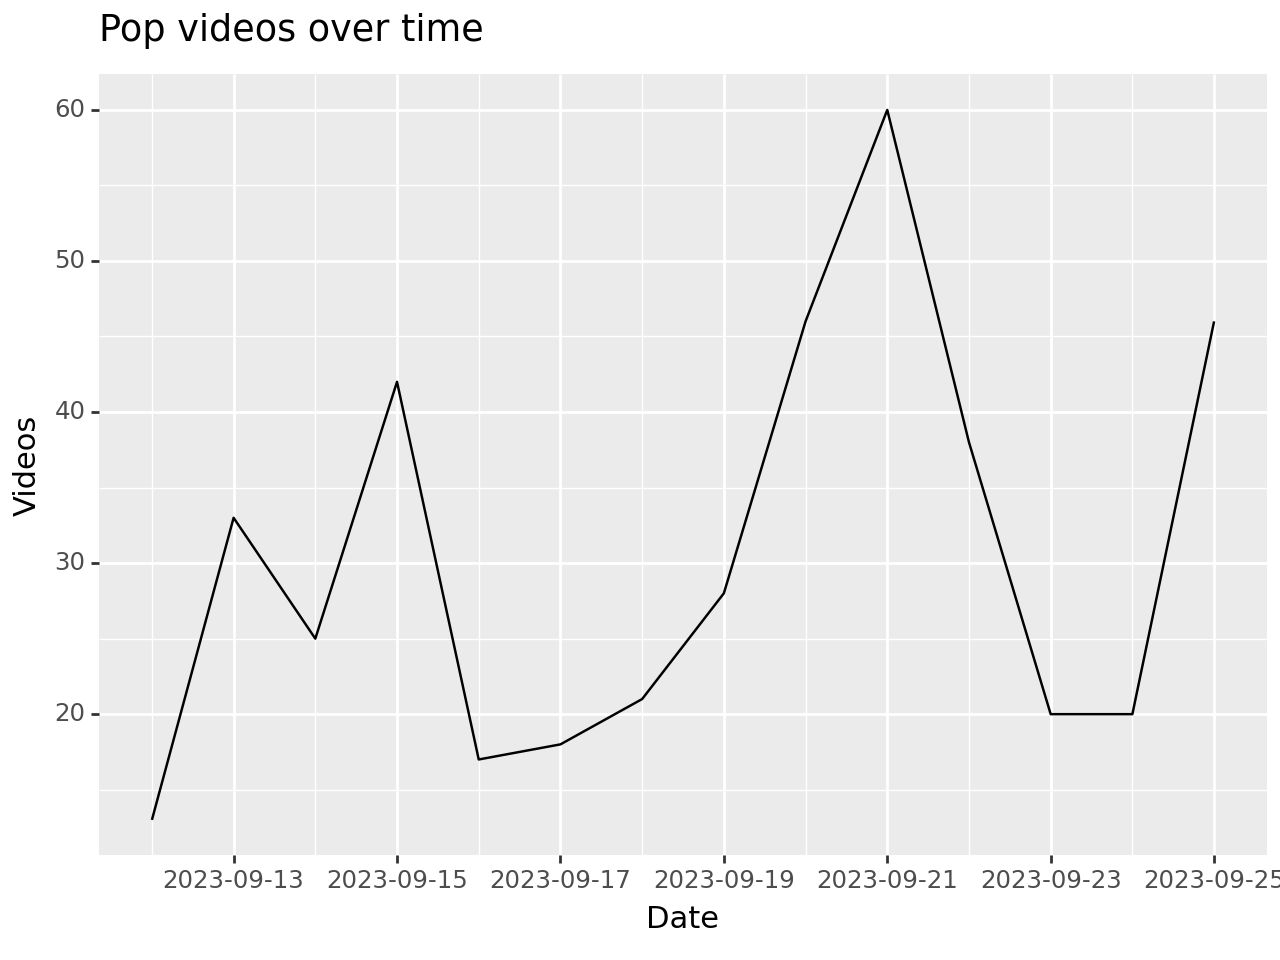

<Figure Size: (640 x 480)>

In [199]:
# swift_pop_videodata over time
videos_over_time(swift_pop_videodata, "Pop videos over time")

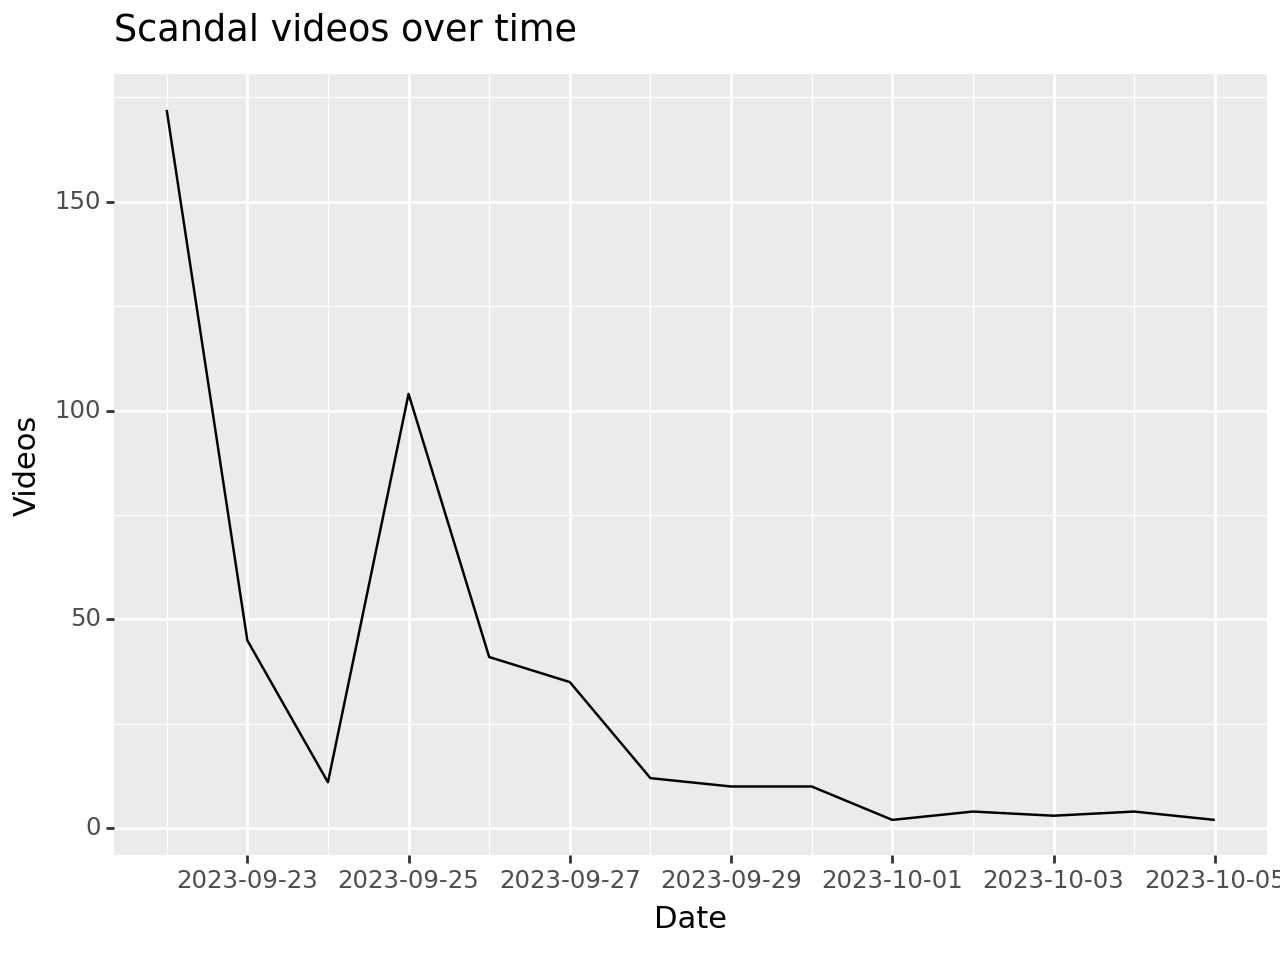

<Figure Size: (640 x 480)>

In [200]:
# menendez_scandal_videodata over time
videos_over_time(menendez_scandal_videodata, "Scandal videos over time")

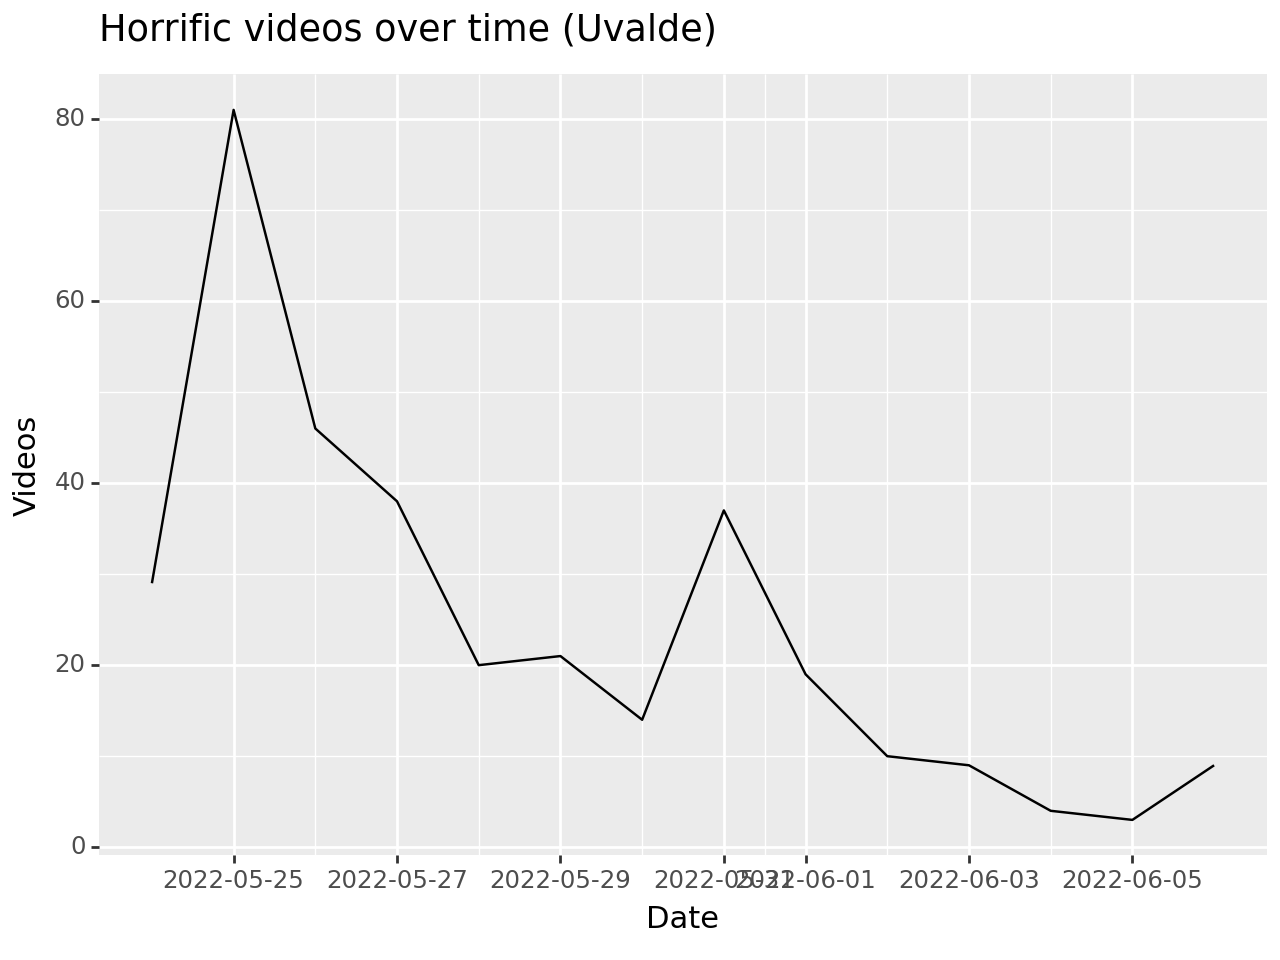

<Figure Size: (640 x 480)>

In [201]:
# uvalde_horrific_videodata over time
videos_over_time(uvalde_horrific_videodata, "Horrific videos over time (Uvalde)")

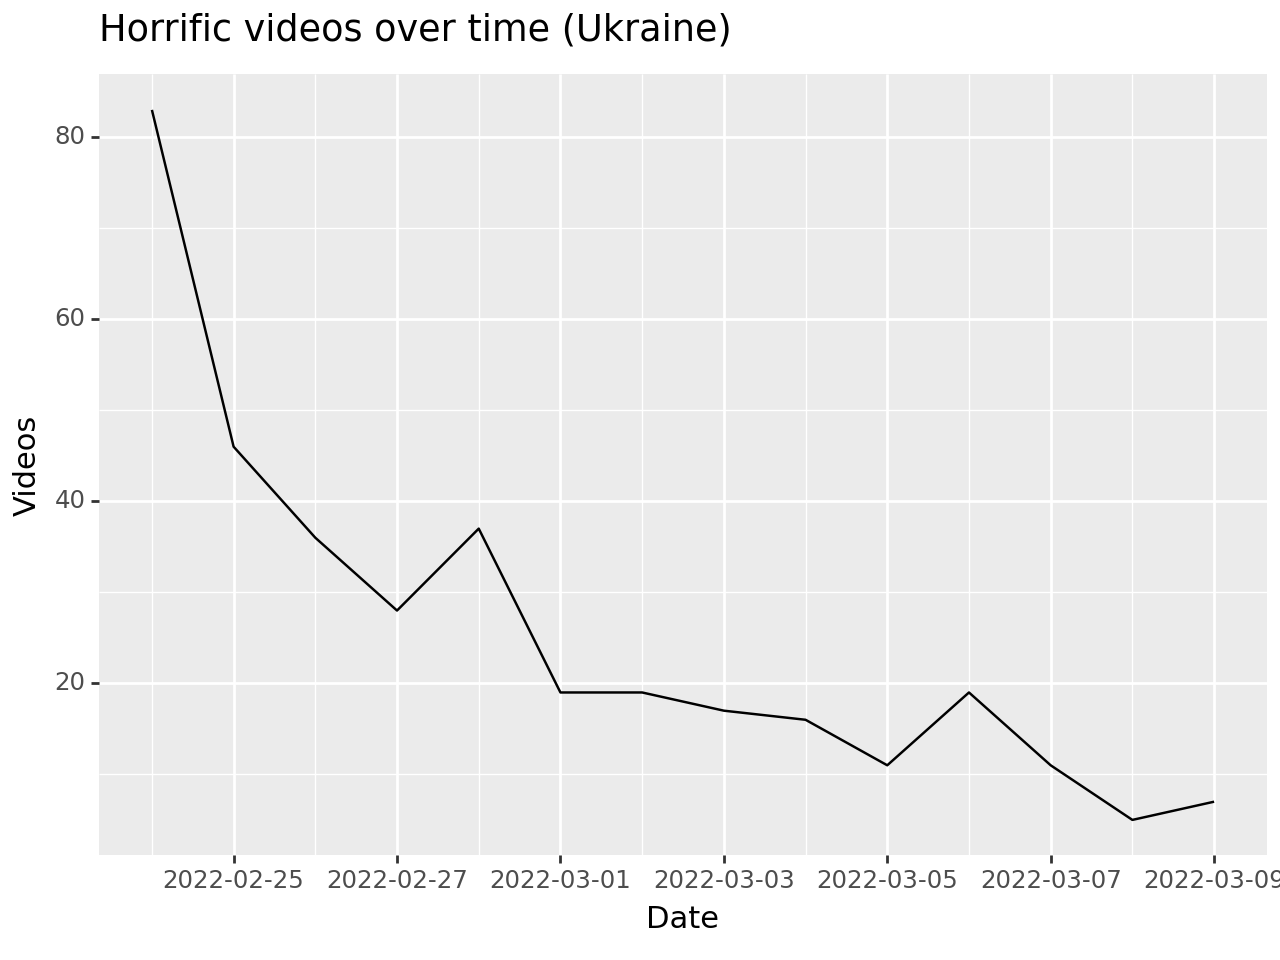

<Figure Size: (640 x 480)>

In [202]:
# ukraine_horrific_videodata over time
videos_over_time(ukraine_horrific_videodata, "Horrific videos over time (Ukraine)")

### Comment Scores over time

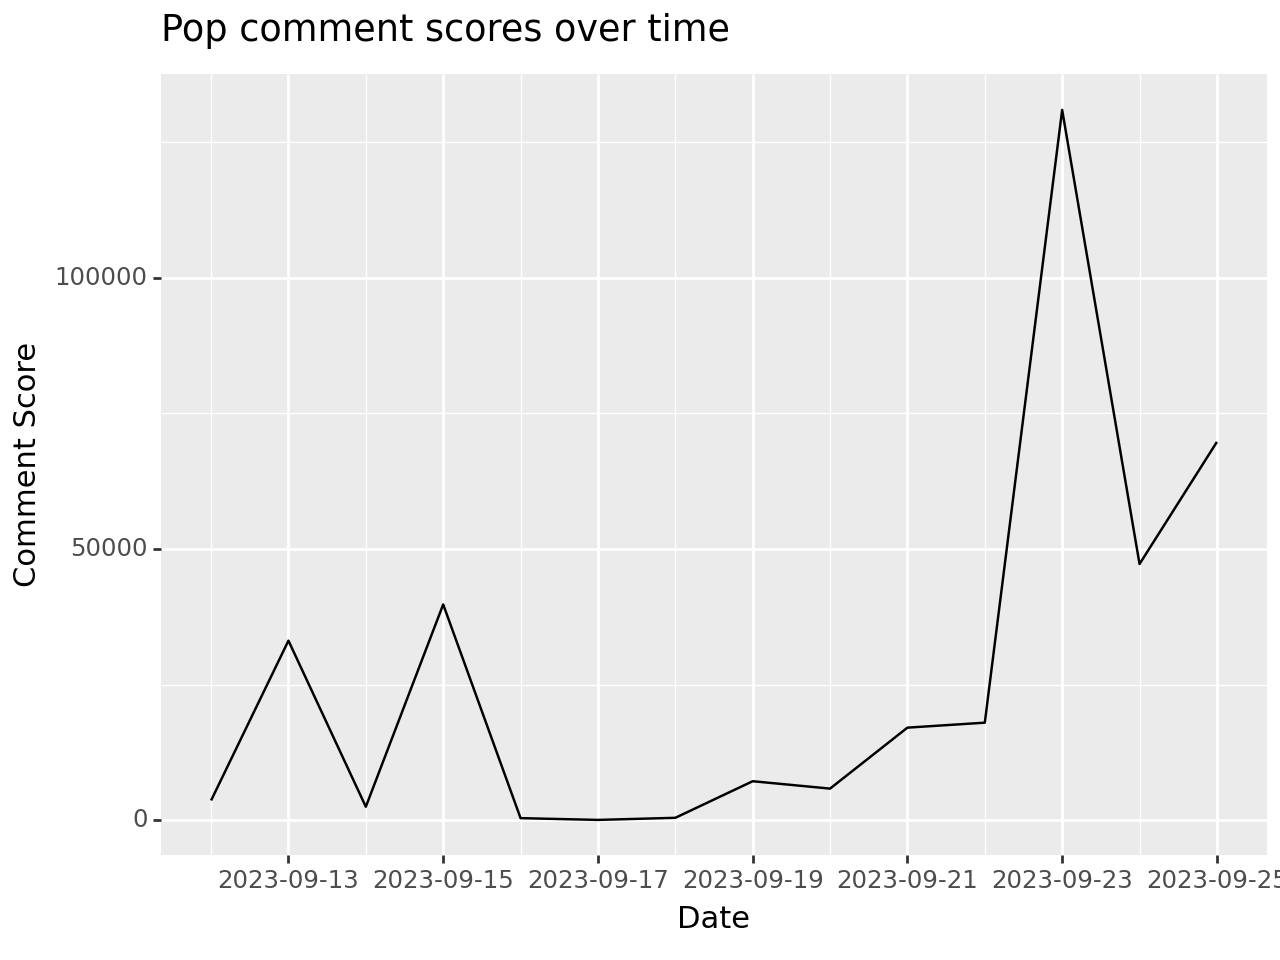

<Figure Size: (640 x 480)>

In [24]:
# Swift Pop comment scores over time
comment_scores_over_time(swift_pop_comments, "Pop comment scores over time")

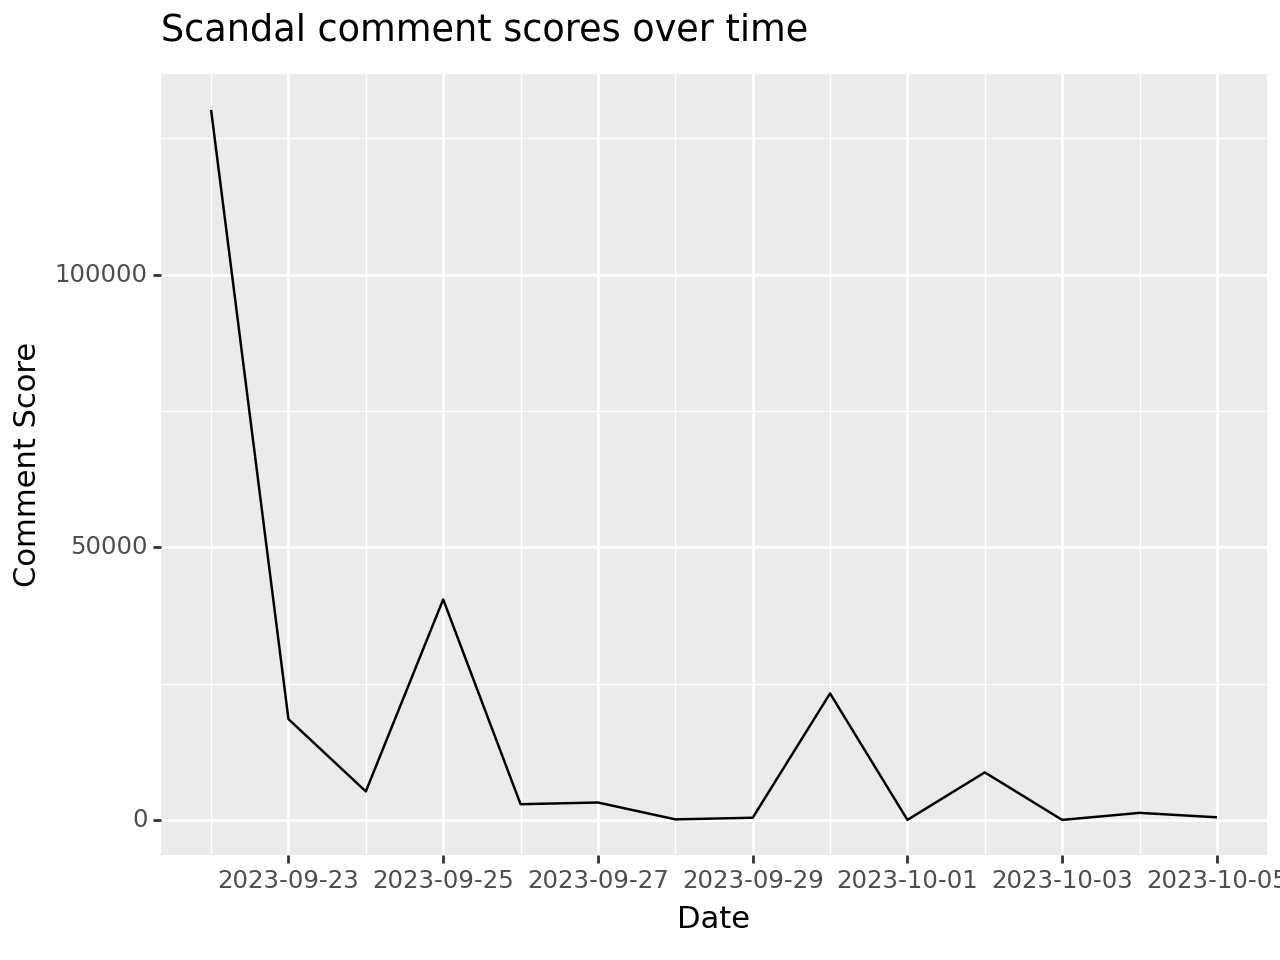

<Figure Size: (640 x 480)>

In [26]:
# Menendez scandal comments scores over time
comment_scores_over_time(menendez_scandal_comments, "Scandal comment scores over time")

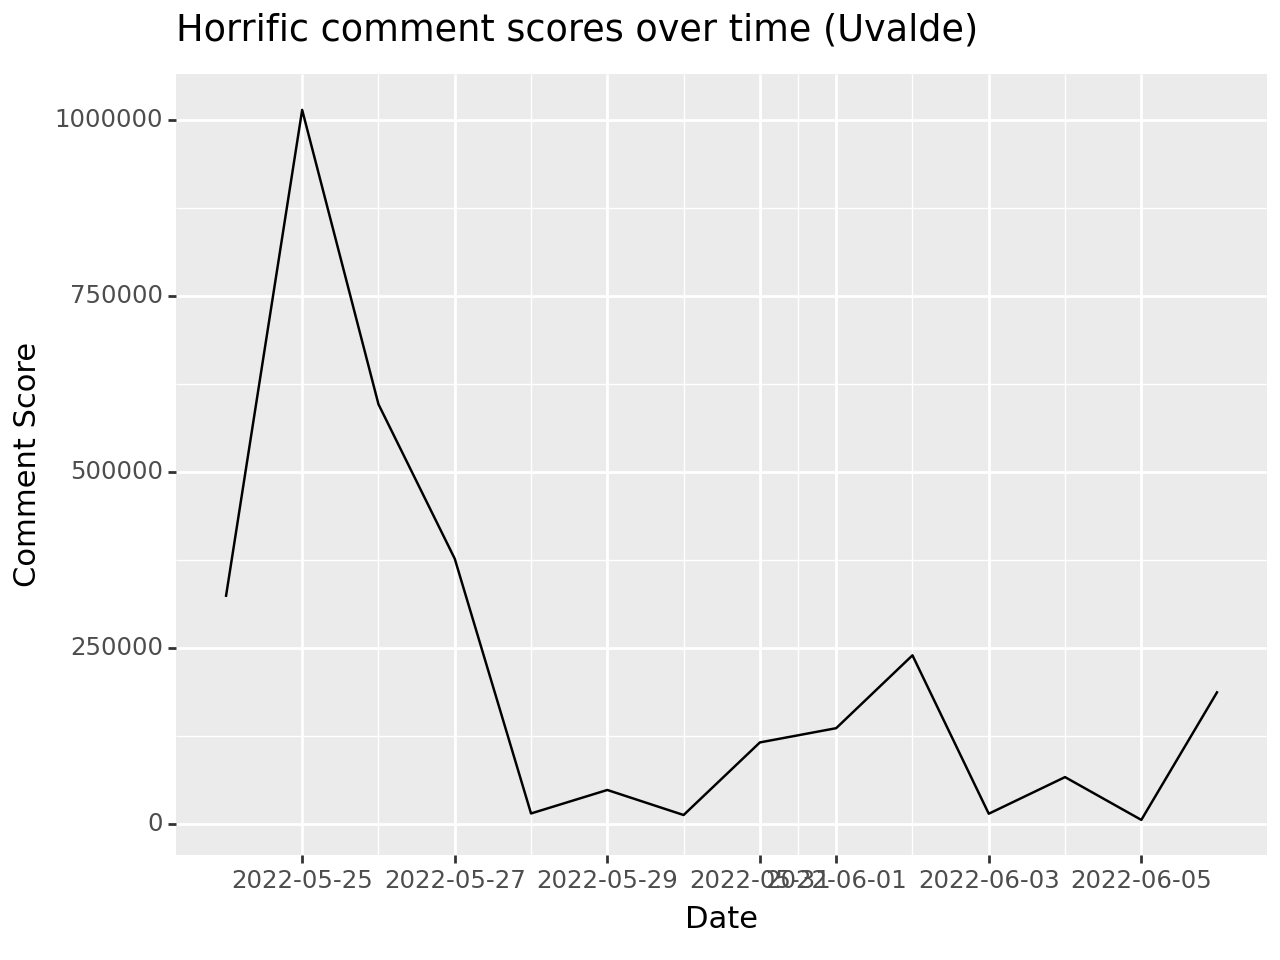

<Figure Size: (640 x 480)>

In [28]:
# Uvalde horrific comment scores over time
comment_scores_over_time(uvalde_horrific_comments, "Horrific comment scores over time (Uvalde)")

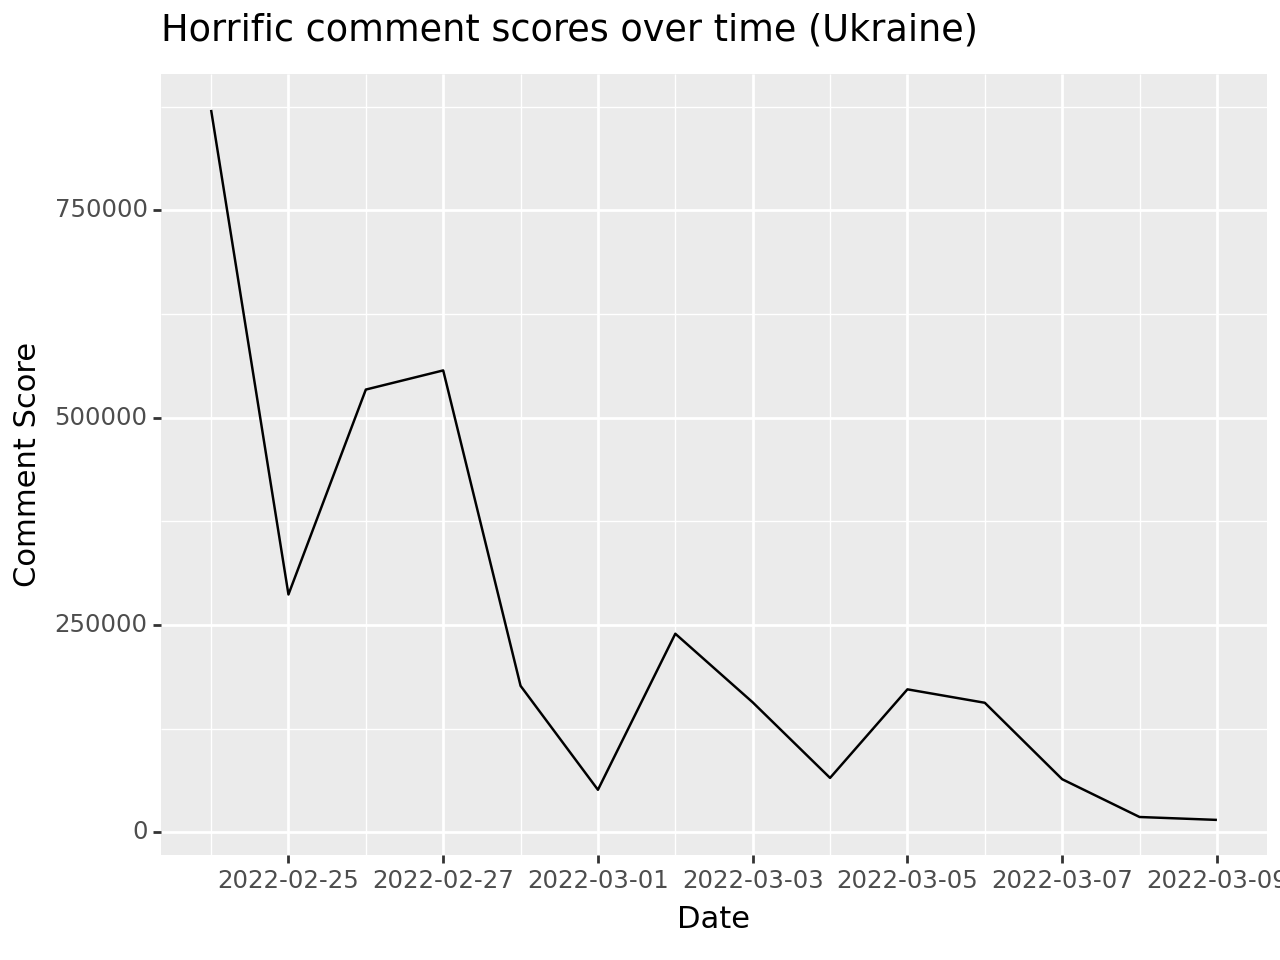

<Figure Size: (640 x 480)>

In [29]:
# Ukraine horrific comment scores over time
comment_scores_over_time(ukraine_horrific_comments, "Horrific comment scores over time (Ukraine)")

### Comments per video over time

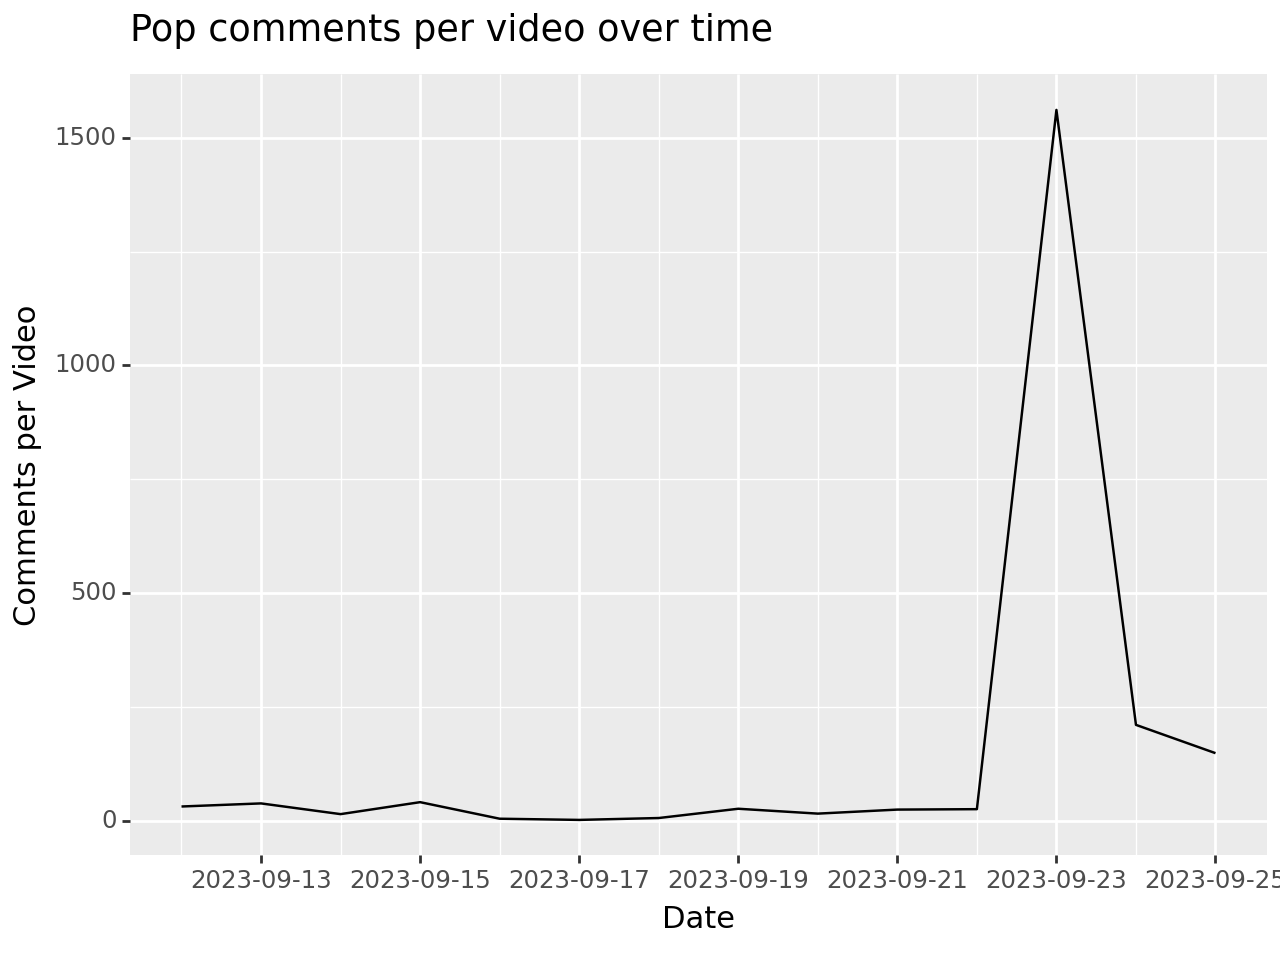

<Figure Size: (640 x 480)>

In [61]:
# Swift pop comments per video over time
comments_per_video_over_time(swift_pop_comments, swift_pop_videodata, "Pop comments per video over time")

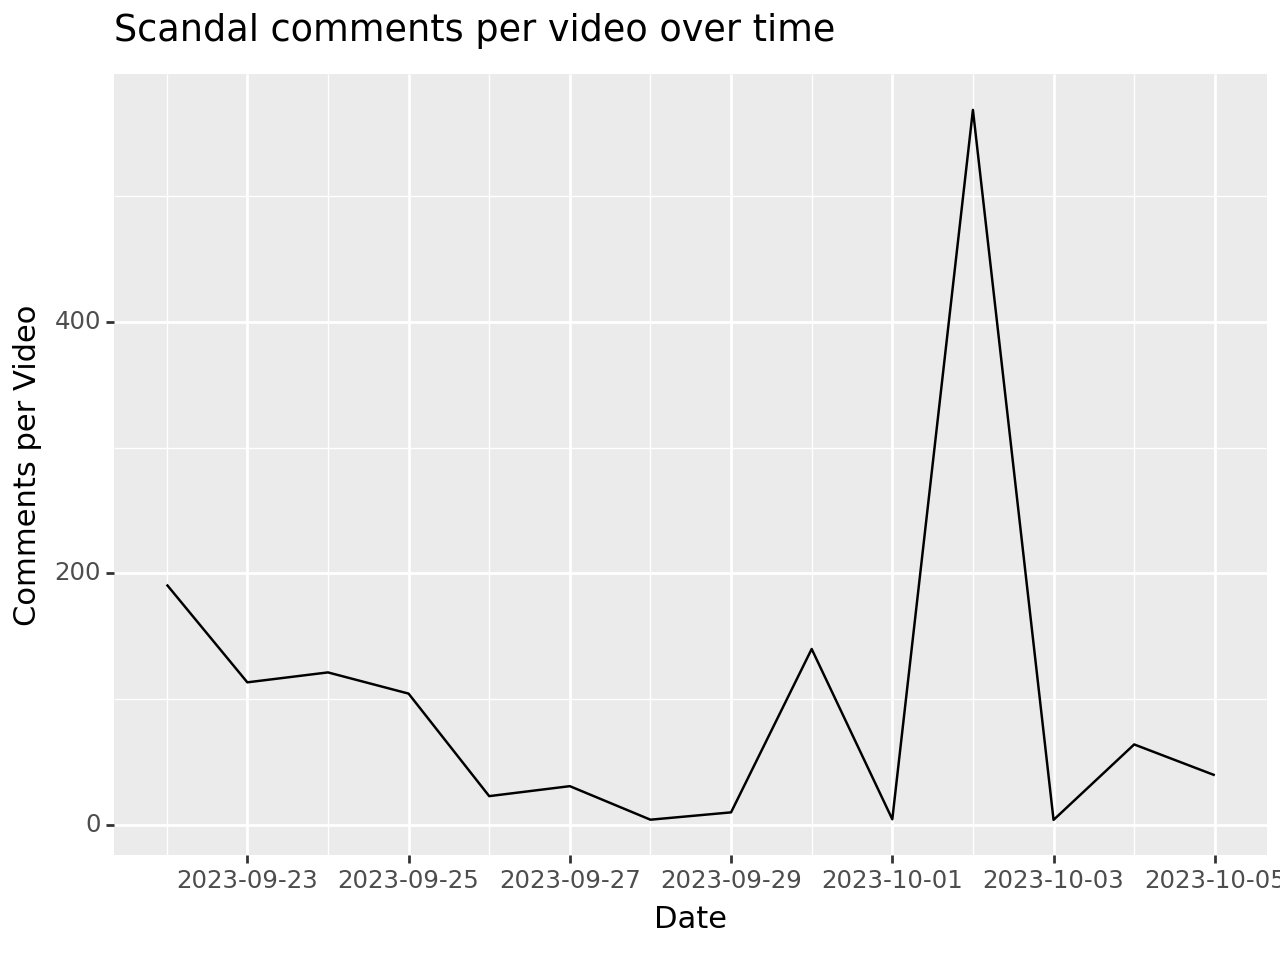

<Figure Size: (640 x 480)>

In [64]:
# Menendez scandal comments per video over time
comments_per_video_over_time(menendez_scandal_comments, menendez_scandal_videodata, "Scandal comments per video over time")

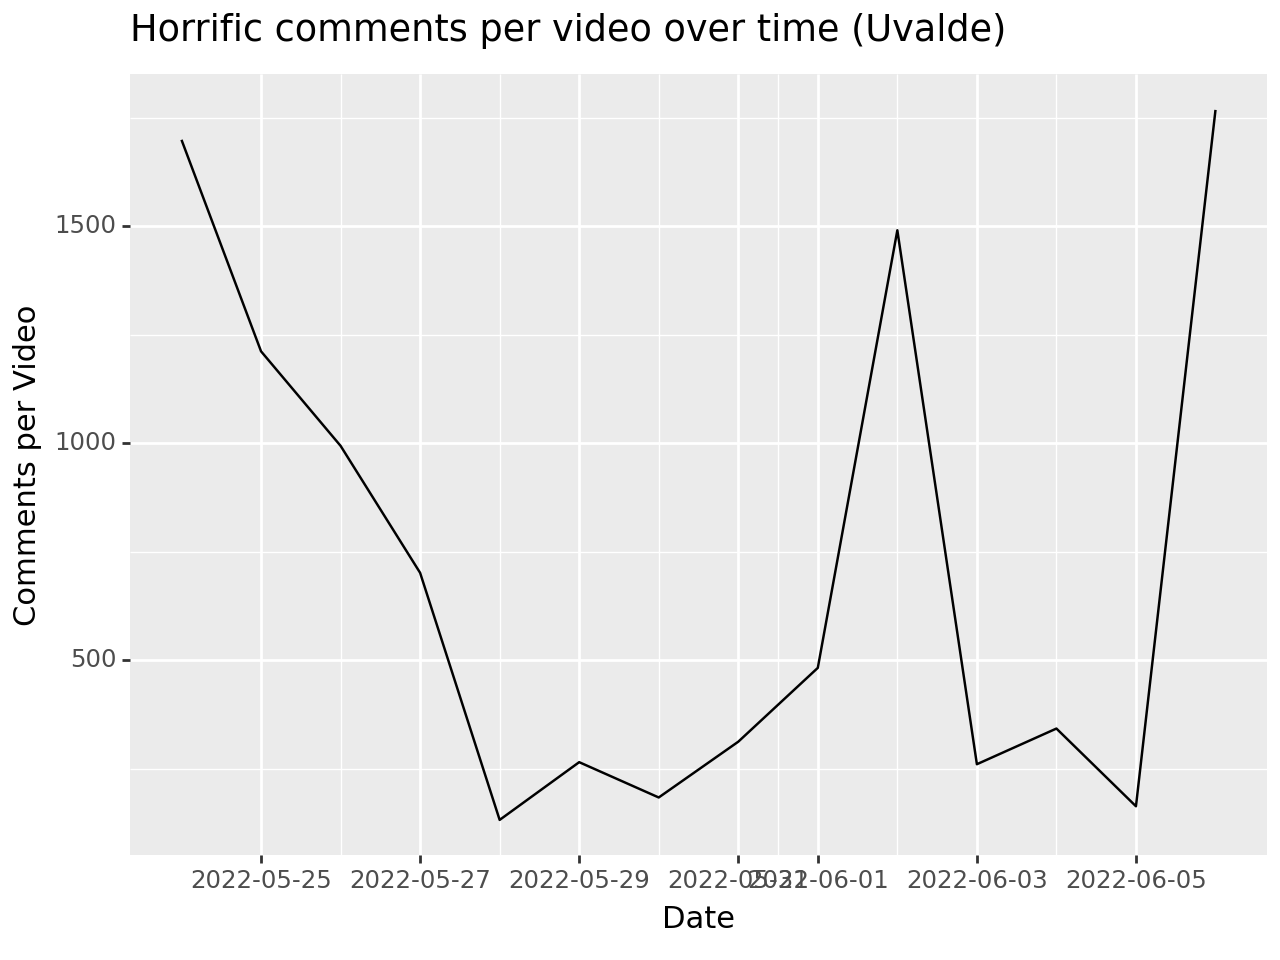

<Figure Size: (640 x 480)>

In [65]:
# Uvalde horrific comments per video over time
comments_per_video_over_time(uvalde_horrific_comments, uvalde_horrific_videodata, "Horrific comments per video over time (Uvalde)")

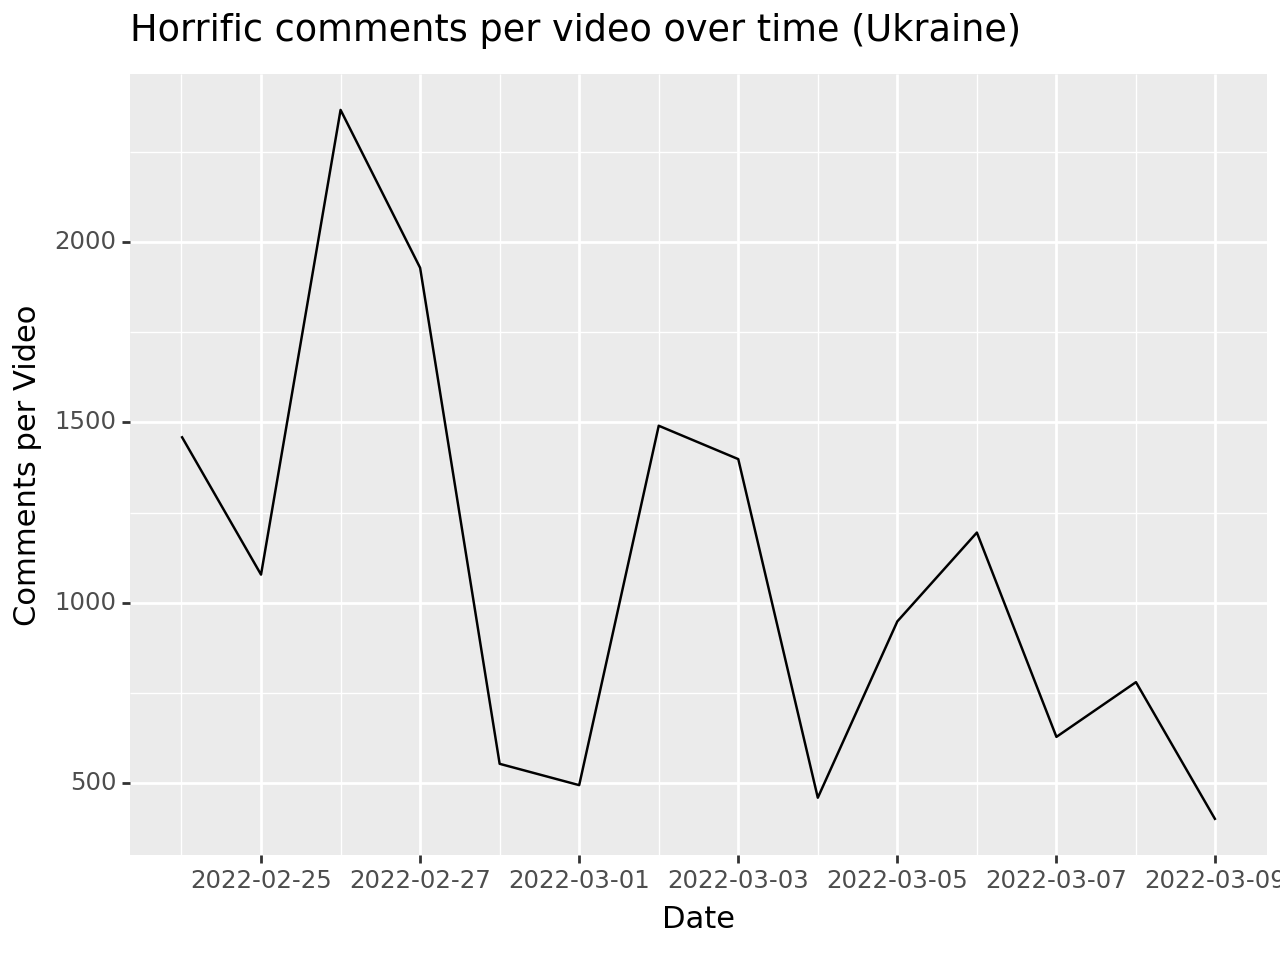

<Figure Size: (640 x 480)>

In [66]:
# Ukraine horrific comments per video over time
comments_per_video_over_time(ukraine_horrific_comments, ukraine_horrific_videodata, "Horrific comments per video over time (Ukraine)")